In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
myf= pd.read_csv('uscomments.csv', error_bad_lines=False)
myf.head()

C:\Users\Shadi\AppData\Local\Temp\ipykernel_3684\3514837217.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  myf= pd.read_csv('uscomments.csv', error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Shadi\AppData\Local\Temp\ipykernel_3684\3514837217.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  myf= pd.read_csv('uscomments.csv', error_bad_lines=False)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [14]:
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.4 MB/s eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 19.2 MB/s eta 0:00:00
     ---------------------------------------- 267.9/267.9 kB ? eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB ? eta 0:00:00


In [3]:
from textblob import TextBlob as textb  #sentiment analysis

In [4]:
textb('the end though <3').sentiment.polarity

1.0

In [5]:
polarity=[]
for i in myf['comment_text']:
    try:
        polarity.append(textb(i).sentiment.polarity)
    except:
        polarity.append('-')

In [7]:
myf["polarity"]= polarity   #add a column "polarity" to df
myf.head(15)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.8
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [14]:
positive= myf[myf['polarity'] == 1]
positive

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [15]:
#wordcloud
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 3.0 MB/s eta 0:00:00


In [19]:
 from wordcloud import WordCloud, STOPWORDS

In [27]:
totposcomments= ','.join(positive['comment_text'])
type(totposcomments)
len(totposcomments)

846560

(-0.5, 799.5, 499.5, -0.5)

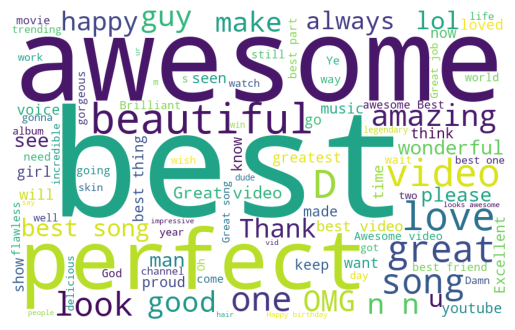

In [36]:
word_cloud= WordCloud(width= 800, height= 500, background_color= 'white', max_words=100, stopwords=STOPWORDS).generate(totposcomments)
plt.imshow(word_cloud)
plt.axis('off')

In [42]:
#tag analysis from another dataset
pd2= pd.read_csv(r'D:\youtubedem\additional_data\usvideos.csv', error_bad_lines=False)
pd2.head()

C:\Users\Shadi\AppData\Local\Temp\ipykernel_3684\3515754214.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd2= pd.read_csv(r'D:\youtubedem\additional_data\usvideos.csv', error_bad_lines=False)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [46]:
tags= ' '.join(pd2['tags'])
len(tags)

11378360

In [51]:
pd2['tags'][0:10]

0                                      SHANtell martin
1    last week tonight trump presidency|"last week ...
2    racist superman|"rudy"|"mancuso"|"king"|"bach"...
3    rhett and link|"gmm"|"good mythical morning"|"...
4    ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...
5    ijustine|"week with iPhone X"|"iphone x"|"appl...
6    SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...
7    5 Ice Cream Gadgets|"Ice Cream"|"Cream Sandwic...
8    Trailer|"Hugh Jackman"|"Michelle Williams"|"Za...
9    vox.com|"vox"|"explain"|"shift change"|"future...
Name: tags, dtype: object